In [4]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
import requests
from datetime import datetime
from citipy import citipy
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the lats and longs to a list
coordinates = list(lat_lngs)
print(coordinates)

[(23.839477009240028, 148.62360345108067), (-83.83086021199964, 33.771761671970154), (26.57542627328175, 109.14100789423259), (-22.306555255523122, -70.88507294680943), (-30.434464256905976, 32.18627679354), (-68.69135132856124, 117.43959715979634), (-15.560420431851838, -3.894082314701876), (88.44156306106134, -47.30652075468825), (-45.35841821529678, -16.423027780578792), (21.088515221998662, 108.14379723451606), (-3.2120874089010556, -140.54458245823633), (-12.404736157224264, -60.18510067560889), (-8.386538417170769, 175.2827973829472), (-67.8452906550414, -85.35778236581984), (-3.9484631173856, -132.2738683939532), (8.801625362284753, -12.177170928502164), (-11.46663537036936, 133.2852172871788), (-21.78484193796183, 68.65627132325653), (-21.307584927907726, 67.20799080953626), (-29.857117350360006, 160.99741126383674), (15.781775573704593, 51.9986137351969), (32.77012676492555, 58.88817486709539), (-9.193429280635726, 100.29430802223544), (-63.0305895012892, -150.43774971147968),

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

626

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6dad2c9df2c03a85596c79c0e3847d92


In [6]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6dad2c9df2c03a85596c79c0e3847d92&q=Boston


In [7]:

# Import our dependencies and initialize counters and an empty list that will hold the weather data.
# Loop through the cities list.
# Group the cities in sets of 50 to log the process as we find the weather data for each city.
# Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.
# Build the city_url or endpoint for each city.
# Log the URL and the record and set numbers.
# Make an API request for each city.
# Parse the JSON weather data for the following:
# City, country, and date
# Latitude and longitude
# Maximum temperature
# Humidity
# Cloudiness
# Wind speed
# Add the data to a list in a dictionary format and then convert the list to a DataFrame.

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | katsuura
Processing Record 2 of Set 1 | port elizabeth
Processing Record 3 of Set 1 | hongjiang
Processing Record 4 of Set 1 | tocopilla
Processing Record 5 of Set 1 | durban
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | jamestown
Processing Record 8 of Set 1 | upernavik
Processing Record 9 of Set 1 | cam pha
City not found. Skipping...
Processing Record 10 of Set 1 | atuona
Processing Record 11 of Set 1 | vilhena
Processing Record 12 of Set 1 | lolua
City not found. Skipping...
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | masingbi
Processing Record 15 of Set 1 | maningrida
Processing Record 16 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 17 of Set 1 | byron bay
Processing Record 18 of Set 1 | salalah
Processing Record 19 of Set 1 | birjand
Processing Record 20 of Set 1 | bengkulu
Processing Record 21 of Set

In [9]:

len(city_data)

573

In [6]:
#Convert the array of dictionaries to Pandas DF
city_data_df = pd.read_csv("weather_data/cities.csv")
city_data_df.head(10)

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Katsuura,JP,2022-01-29 00:19:16,35.1333,140.3000,45.10,70,100,7.85
1,1,Port Elizabeth,ZA,2022-01-29 00:17:22,-33.9180,25.5701,66.09,94,75,12.66
2,2,Hongjiang,CN,2022-01-29 00:19:16,27.1100,109.9956,34.07,98,100,3.62
3,3,Tocopilla,CL,2022-01-29 00:19:16,-22.0920,-70.1979,67.53,74,23,4.43
4,4,Durban,ZA,2022-01-29 00:19:17,-29.8579,31.0292,70.92,93,98,5.01
5,5,Albany,US,2022-01-29 00:17:42,42.6001,-73.9662,25.45,78,100,4.00
6,6,Jamestown,US,2022-01-29 00:19:17,42.0970,-79.2353,15.08,51,100,9.22
7,7,Upernavik,GL,2022-01-29 00:15:08,72.7868,-56.1549,4.06,68,100,6.87
8,8,Atuona,PF,2022-01-29 00:19:17,-9.8000,-139.0333,77.76,72,8,13.53
9,9,Vilhena,BR,2022-01-29 00:15:54,-12.7406,-60.1458,69.69,97,94,0.94


In [7]:
# Reorder the columns as City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Katsuura,JP,2022-01-29 00:19:16,35.1333,140.3000,45.10,70,100,7.85
1,Port Elizabeth,ZA,2022-01-29 00:17:22,-33.9180,25.5701,66.09,94,75,12.66
2,Hongjiang,CN,2022-01-29 00:19:16,27.1100,109.9956,34.07,98,100,3.62
3,Tocopilla,CL,2022-01-29 00:19:16,-22.0920,-70.1979,67.53,74,23,4.43
4,Durban,ZA,2022-01-29 00:19:17,-29.8579,31.0292,70.92,93,98,5.01
5,Albany,US,2022-01-29 00:17:42,42.6001,-73.9662,25.45,78,100,4.00
6,Jamestown,US,2022-01-29 00:19:17,42.0970,-79.2353,15.08,51,100,9.22
7,Upernavik,GL,2022-01-29 00:15:08,72.7868,-56.1549,4.06,68,100,6.87
8,Atuona,PF,2022-01-29 00:19:17,-9.8000,-139.0333,77.76,72,8,13.53
9,Vilhena,BR,2022-01-29 00:15:54,-12.7406,-60.1458,69.69,97,94,0.94


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [9]:
# Extract relevant fields from DF for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


1643493171.8009303

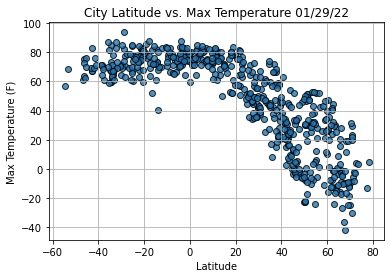

In [10]:
# Import time module
import time

# Build the scatter plot for latitude vs. max. temperature
plt.scatter(lats, max_temps, edgecolors="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

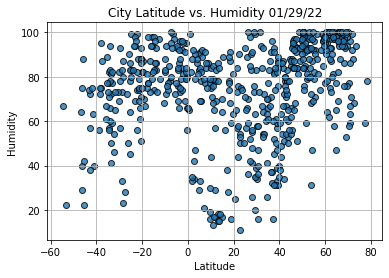

In [17]:
# Build the scatter plot for latitude vs. max. temperature
plt.scatter(lats, humidity, edgecolors="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig2.png")

# Show plot
plt.show()

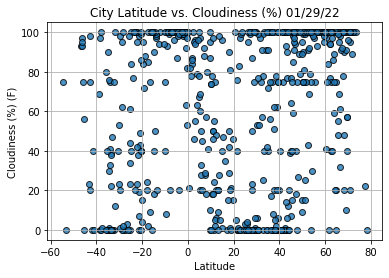

In [18]:
# Build the scatter plot for latitude vs. max. temperature
plt.scatter(lats, cloudiness, edgecolors="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%) (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig3.png")

# Show plot
plt.show()

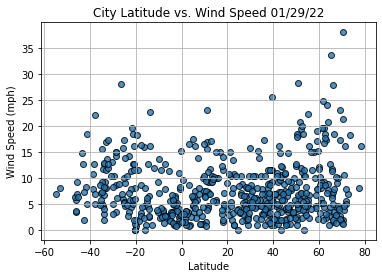

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()